UCSP- DIP en Machine Learning, Deep Learning y sus Aplicaciones en Industria | Course 5:  Deep learning | Profesor: Pablo Calcina Cari, José Ochoa Luna | Presentado: Hector Pérez V

# Detección de spam de SMS con Deep Learning

La filtración de spam de SMS en teléfonos aún no es muy sólida en comparación con la filtración de spam de correo electrónico. Las metodologías de vanguardia basadas en Deep Learning se pueden utilizar para resolver este problema de clasificación binaria de detección de spam de SMS. 

Utilizaremos las dos arquitecturas de redes neuronales:
Long Short-Term Memory (LSTM) y DenseNet (Densely Connected Convolutional Neural Network (CNN)) para este propósito

# Ejecución en google Colab

In [1]:
#  Colab
#from google.colab import drive
#drive.mount('/gdrive')

In [2]:
# %cd '/gdrive/ My Drive/ucsp/trabajo_deep'

In [3]:
# creating a new directory named plots
!mkdir plots

# creating a new directory named models
!mkdir models

# creating a new directory named processed_datasets
!mkdir processed_datasets

Ya existe el subdirectorio o el archivo plots.
Ya existe el subdirectorio o el archivo models.
Ya existe el subdirectorio o el archivo processed_datasets.


In [4]:
#!ls '/gdrive/My Drive/ucsp/trabajo_deep'

In [5]:
# downloading UCI SMS Spam Collection dataset
!wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [6]:
# extracting the downloaded dataset
!unzip smsspamcollection.zip

"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [7]:
# listing files and directories
!ls

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


**Información referente Dataset SMS Spam Collection**
Enlace del conjunto de datos  - http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

## Cargar librerias

In [8]:
# importing library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib as mpl
import platform
import sklearn

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [9]:
# show version 

libraries = {
    'Python:':platform.python_version(),
    'Matplotlib':mpl.__version__,
    'Pandas':pd.__version__,
    'Seaborn':sns.__version__,
    'Numpy':np.__version__,
    'Scikit-Learn':sklearn.__version__,
    'TensorFlow':tf.__version__,
    }
for items in libraries:
  print(f"- {items} {libraries[items]}")
  


- Python: 3.8.12
- Matplotlib 3.5.1
- Pandas 1.3.4
- Seaborn 0.11.2
- Numpy 1.19.3
- Scikit-Learn 1.0.1
- TensorFlow 2.4.0


In [10]:
# configuring the pandas dataframes to show all columns
pd.options.display.max_columns = None

# configuring the pandas dataframes to increase the maximum column width
pd.options.display.max_colwidth = 150

In [11]:
# importing SMSSpamCollection dataset to a pandas dataframe from drive
#df_sms_spam = pd.read_csv('SMSSpamCollection',sep='\t',header=None, names=['class', 'sms_message'])
#df_sms_spam.head()

In [12]:
# importing SMSSpamCollection dataset to a pandas dataframe from url
#url = 'https://raw.githubusercontent.com/hperez/ucsp_ml_cyber/main/data/SMSSpamCollection'
#df_sms_spam = pd.read_csv(url,sep='\t',header=None, names=['class', 'sms_message'])
#df_sms_spam.head()

## Ejecución en Servidor Local

In [13]:
# importing SMSSpamCollection dataset to a pandas dataframe
df_sms_spam = pd.read_csv(
    'data/SMSSpamCollection',
    sep='\t',
    header=None,
    names=['class',
    'sms_message'])
df_sms_spam.head()

,class,sms_message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


# Análisis y preprocesamiento de datos

In [14]:
# printing the columns of the dataframe
df_sms_spam.columns

Index(['class', 'sms_message'], dtype='object')

In [15]:
# changing the order of the dataframe columns for better visualization
df_sms_spam = df_sms_spam[['sms_message', 'class']]
df_sms_spam.head(10)

,sms_message,class
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
5,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",spam
6,Even my brother is not like to speak with me. They treat me like aids patent.,ham
7,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your frie...,ham
8,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 ...,spam
9,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 080...,spam


In [16]:
# displaying the dimensionality of the dataframe
df_sms_spam.shape

(5572, 2)

In [17]:
# printing a concise summary of the dataframe
# information such as index, data type, columns, non-null values,
# and memory usage
df_sms_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sms_message  5572 non-null   object
 1   class        5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
# generating descriptive statistics of the dataframe
df_sms_spam.describe()

,sms_message,class
count,5572,5572
unique,5169,2
top,"Sorry, I'll call later",ham
freq,30,4825


In [19]:
# generating descriptive statistics for each class of the dataframe
# T property is used to transpose index and columns of the dataframe
df_sms_spam.groupby('class').describe().T

class                                  ham  \
sms_message count                     4825   
            unique                    4516   
            top     Sorry, I'll call later   
            freq                        30   

class                                                                                                                                                              spam  
sms_message count                                                                                                                                                   747  
            unique                                                                                                                                                  653  
            top     Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!  
            freq                                                                                                                                                      4

In [20]:
# checking for missing or null values in the dataframe
df_null = df_sms_spam[df_sms_spam.isnull().any(axis=1)]
df_null

,sms_message,class


In [21]:
# printing the number of rows with any missing or null values
# in the dataframe
df_null.shape[0]

0

In [22]:
# removing the missing or null values from the dataframe if exist
df_sms_spam = df_sms_spam[df_sms_spam.notna().all(axis=1)]

# printing the count of null values in class and sms_message
# columns of the dataframe
df_sms_spam[['class', 'sms_message']].isnull().sum()

class          0
sms_message    0
dtype: int64

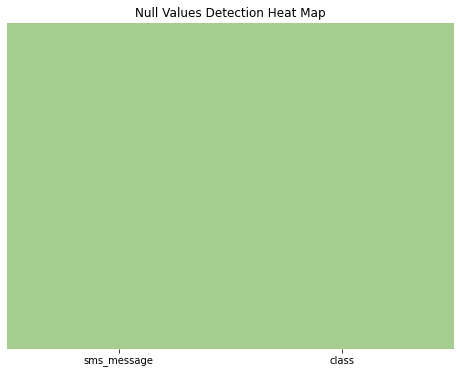

In [23]:
# plotting the heatmap for missing or null values in the dataframe

f, ax = plt.subplots(figsize=(8, 6))
ax= sns.heatmap(df_sms_spam.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='crest')
ax.set_title('Null Values Detection Heat Map')
plt.savefig('plots/null_detection_heat_map.png',
            facecolor='white')
plt.show()

<AxesSubplot:>

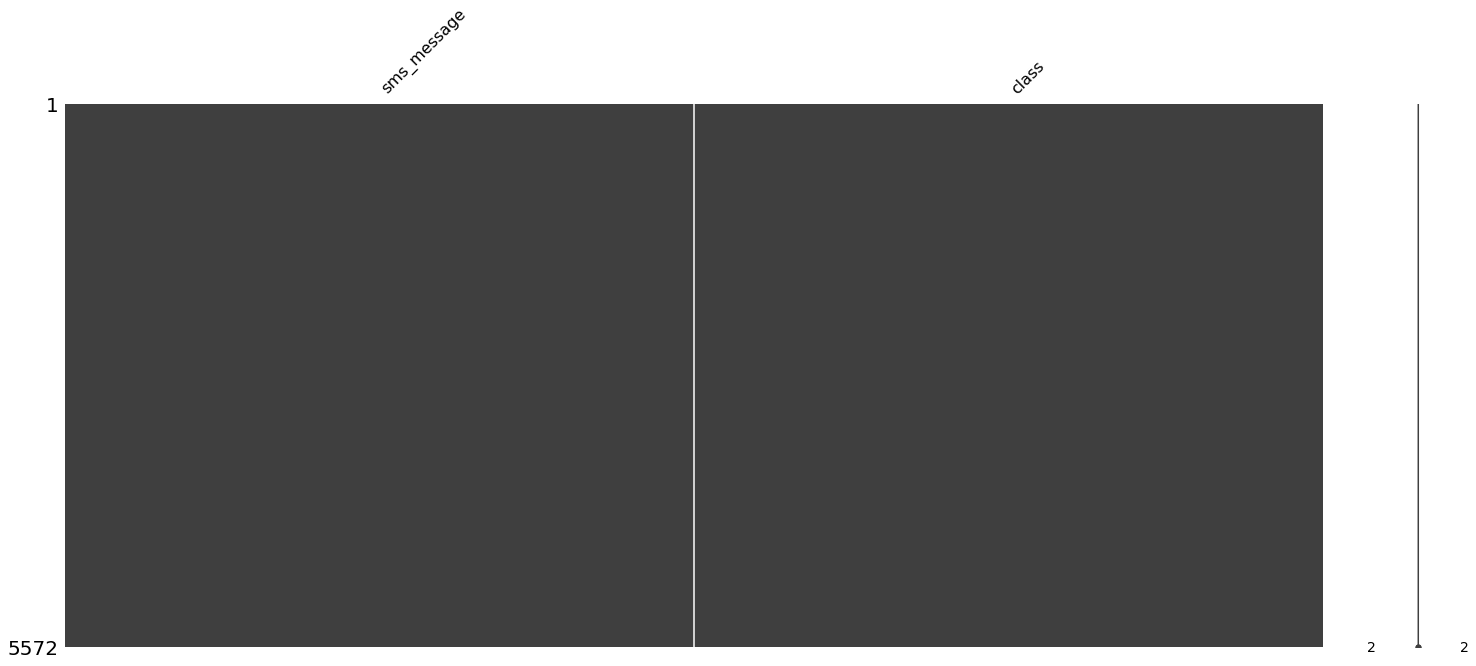

In [24]:
# importing missingno library
import missingno as msno

# plotting a matrix visualization of the nullity of the dataframe

fig = msno.matrix(df_sms_spam)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/msno_matrix.png',
                 bbox_inches='tight')
fig

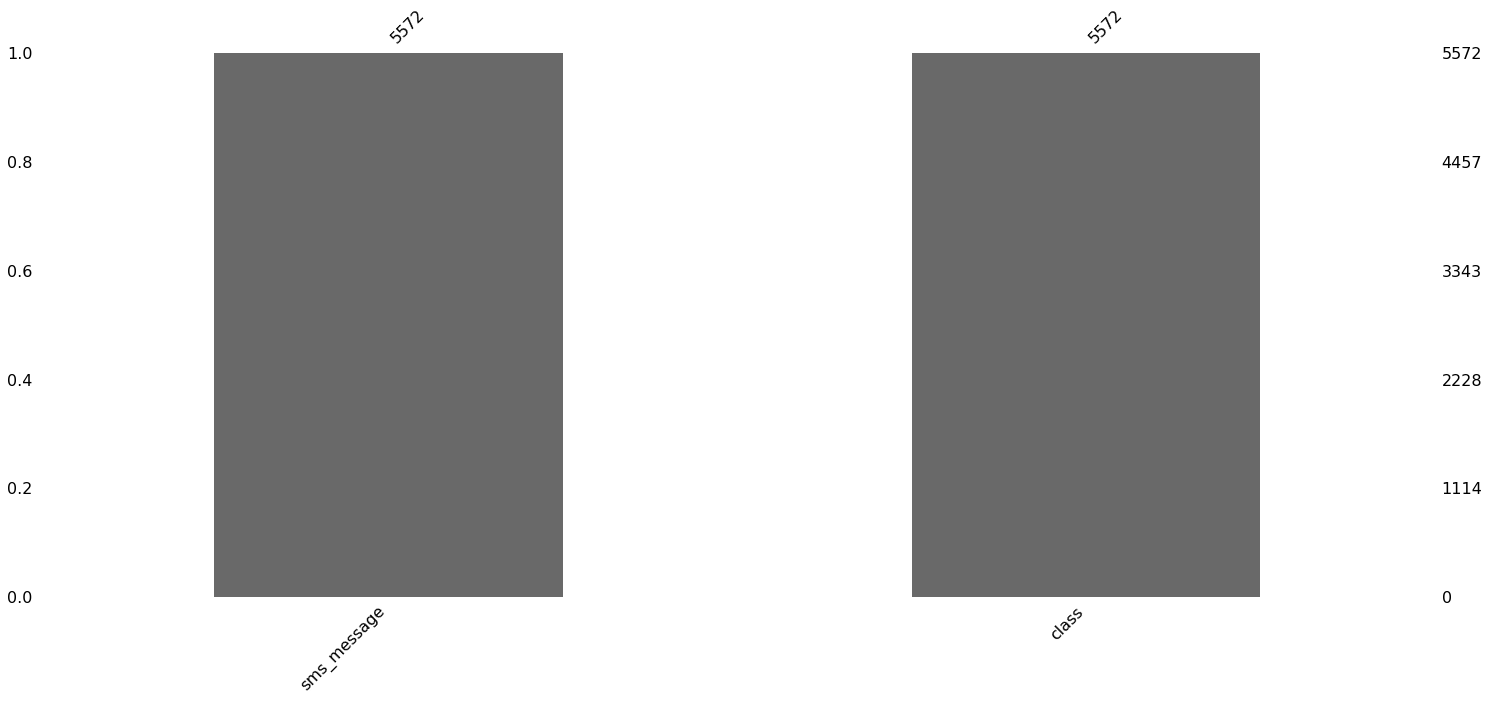

In [25]:
f, ax = plt.subplots(figsize=(4, 2))
ax = msno.bar(df_sms_spam)

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


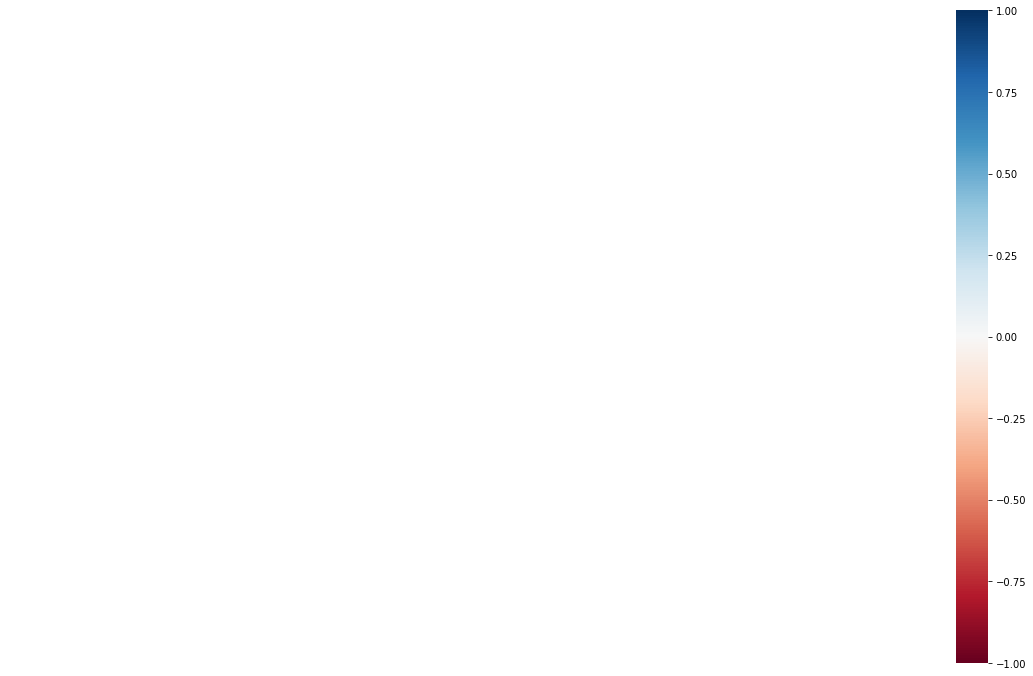

In [26]:
# plotting a seaborn heatmap visualization of nullity correlation
# in the dataframe

ax = msno.heatmap(df_sms_spam)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/msno_heatmap.png',
                 bbox_inches='tight')


In [27]:
# detecting duplicate rows exist in the dataframe before cleaning
duplicated_records = df_sms_spam[df_sms_spam.duplicated()]
duplicated_records

,sms_message,class
103,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your frie...,ham
154,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your frie...,ham
207,"As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We w...",ham
223,"Sorry, I'll call later",ham
326,No calls..messages..missed calls,ham
...,...,...
5524,You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p ...,spam
5535,"I know you are thinkin malaria. But relax, children cant handle malaria. She would have been worse and its gastroenteritis. If she takes enough to...",ham
5539,Just sleeping..and surfing,ham
5553,Hahaha..use your brain dear,ham


In [28]:
# checking the number of duplicate rows exist in the dataframe
# before cleaning
df_sms_spam.duplicated().sum()

403

In [29]:
# removing the duplicate rows from the dataframe if exist
df_sms_spam = df_sms_spam.drop_duplicates()
df_sms_spam

,sms_message,class
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-...",spam
5568,Will ü b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other suggestions?",ham
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


In [30]:
# checking the number of duplicate rows exist in the dataframe
# after cleaning
df_sms_spam.duplicated().sum()

0

In [31]:
# displaying the dimensionality of the dataframe
df_sms_spam.shape

(5169, 2)

In [32]:
# printing a concise summary of the dataframe
# information such as index, data type, columns, non-null values,
# and memory usage
df_sms_spam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sms_message  5169 non-null   object
 1   class        5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [33]:
# generating descriptive statistics of the dataframe
df_sms_spam.describe()

,sms_message,class
count,5169,5169
unique,5169,2
top,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
freq,1,4516


In [34]:
# generating descriptive statistics for each class of the dataframe
# T property is used to transpose index and columns of the dataframe
df_sms_spam.groupby('class').describe().T

class                                                                                                                           ham  \
sms_message count                                                                                                              4516   
            unique                                                                                                             4516   
            top     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...   
            freq                                                                                                                  1   

class                                                                                                                                                                spam  
sms_message count                                                                                                                                                     653  
            unique                                                                                                                                                    653  
            top     Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...  
            freq                                                                                                                                                        1

In [35]:
# saving cleaned dataset to a csv file
file_name = 'processed_datasets/cleaned_dataset.csv'
df_sms_spam.to_csv(file_name,
                          encoding='utf-8',
                          index=False)

# loading dataset from the saved csv file to a pandas dataframe
df_cleaned_sms_spam = pd.read_csv(file_name)
df_cleaned_sms_spam

,sms_message,class
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
...,...,...
5164,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-...",spam
5165,Will ü b going to esplanade fr home?,ham
5166,"Pity, * was in mood for that. So...any other suggestions?",ham
5167,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


In [36]:
# importing set of stopwords from wordcloud library
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

# printing number of stopwords defined in wordcloud library
len(stopwords)

192

In [37]:
# importing random library
# used for generating random numbers
import random

# printing 10 random values of stopwords set
for i, val in enumerate(random.sample(stopwords, 10)):
    print(val)

weren't
the
its
from
been
haven't
about
between
most
i'd


In [38]:
# importing WordCloud object for generating and drawing
# wordclouds from wordcloud library
from wordcloud import WordCloud


# defining a function to return the wordcloud for a given text
def plot_wordcloudHam(text):
    wordcloud = WordCloud(width=600,
                          height=300,
                          background_color='forestgreen',
                          stopwords=stopwords,
                          max_font_size=50,
                          colormap='Oranges').generate(text)
    return wordcloud

def plot_wordcloudSpam(text):
    wordcloud = WordCloud(width=600,
                          height=300,
                          background_color='darkred',
                          stopwords=stopwords,
                          max_font_size=50,
                          colormap='Oranges').generate(text)
    return wordcloud

In [39]:
# extracting the data instances with class label 'ham'
df_ham = df_cleaned_sms_spam[df_cleaned_sms_spam['class'] == 'ham']
df_ham

,sms_message,class
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
6,Even my brother is not like to speak with me. They treat me like aids patent.,ham
...,...,...
5162,Huh y lei...,ham
5165,Will ü b going to esplanade fr home?,ham
5166,"Pity, * was in mood for that. So...any other suggestions?",ham
5167,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


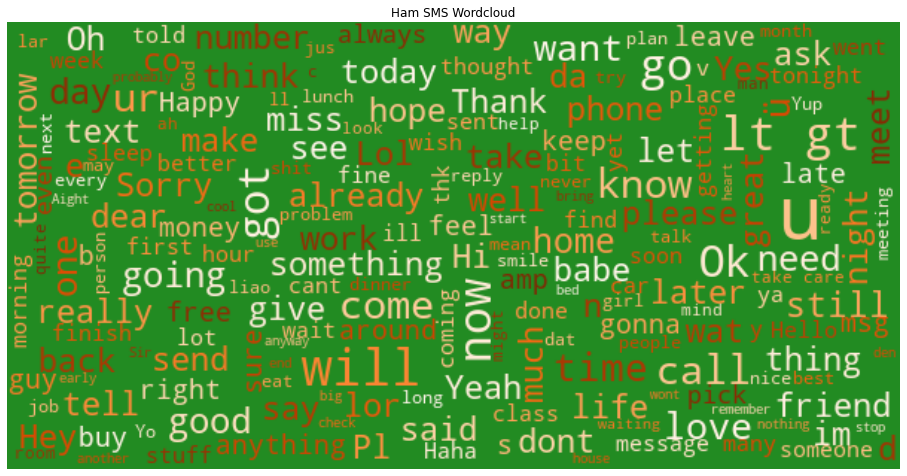

In [40]:
# creating numpy list to visualize using wordcloud
ham_sms_message_text = ' '.join(df_ham['sms_message'].to_numpy().tolist())

# generating wordcloud for ham sms messages
ham_sms_wordcloud = plot_wordcloudHam(ham_sms_message_text)
plt.figure(figsize=(16, 10))
plt.imshow(ham_sms_wordcloud,
           interpolation='bilinear')
plt.axis('off')
plt.title('Ham SMS Wordcloud')
plt.savefig('plots/ham_wordcloud.png',
            facecolor='white')
plt.show()

In [41]:
# extracting the data instances with class label 'spam'
df_spam = df_cleaned_sms_spam[df_cleaned_sms_spam['class'] == 'spam']
df_spam

,sms_message,class
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,spam
5,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",spam
8,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 ...,spam
9,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 080...,spam
11,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info",spam
...,...,...
5137,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,spam
5139,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250...,spam
5146,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove...",spam
5163,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",spam


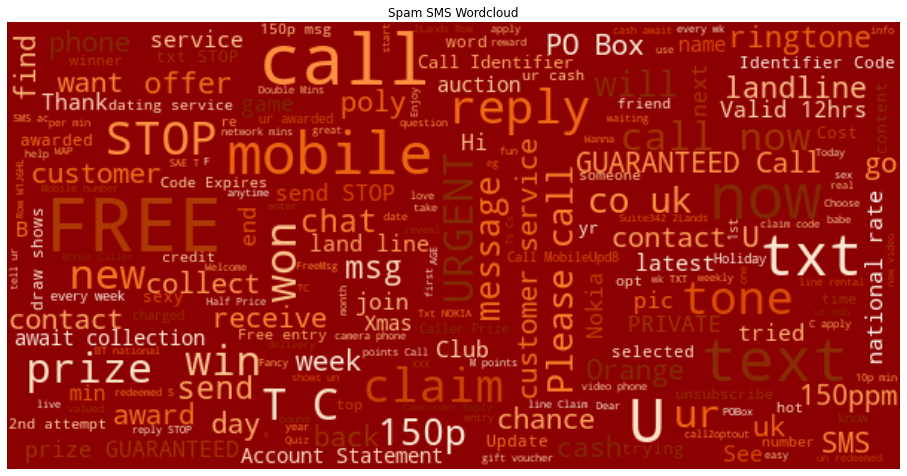

In [42]:
#from functions.graphic import plot_wordcloudSpam
# creating numpy list to visualize using wordcloud
spam_sms_message_text = ' '.join(df_spam['sms_message'].to_numpy().tolist())

# generating wordcloud for spam sms messages
spam_sms_wordcloud = plot_wordcloudSpam(spam_sms_message_text)
plt.figure(figsize=(16, 10))
plt.imshow(spam_sms_wordcloud,
           interpolation='bilinear')
plt.axis('off')
plt.title('Spam SMS Wordcloud')
plt.savefig('plots/spam_wordcloud.png',
            facecolor='white')
plt.show()

In [43]:
# printing count of values in each class of the dataframe
df_cleaned_sms_spam['class'].value_counts()

ham     4516
spam     653
Name: class, dtype: int64

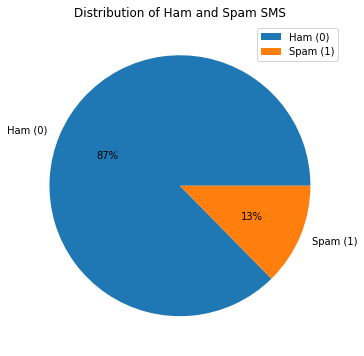

In [44]:
# plotting the distribution of target values
fig,ax = plt.subplots(figsize=(8, 6))
lbl = ['Ham (0)', 'Spam (1)']
pct = '%1.0f%%'
ax = df_cleaned_sms_spam['class'].value_counts().plot(kind='pie',
                                                             labels=lbl,
                                                             autopct=pct)
ax.yaxis.set_visible(False)
plt.title('Distribution of Ham and Spam SMS')
plt.legend()
fig.savefig('plots/ham_spam_pie_chart.png',
            facecolor='white')
plt.show()

In [45]:

# 653 messages in each class
df_downsampled_ham = df_ham.sample(n=len(df_spam),random_state=44)
df_downsampled_ham

,sms_message,class
1597,"Evening * v good if somewhat event laden. Will fill you in, don't you worry … Head * ok but throat * wrecked. See you at six then!",ham
1560,I'll probably be around mu a lot,ham
2767,ALRITE,ham
3892,Lol I would but despite these cramps I like being a girl.,ham
1243,Waiting 4 my tv show 2 start lor... U leh still busy doing ur report?,ham
...,...,...
4377,"Alright we'll bring it to you, see you in like &lt;#&gt; mins",ham
1375,No wonder... Cos i dun rem seeing a silver car... But i thk i saw a black one...,ham
2857,Ah you see. You have to be in the lingo. I will let you know wot on earth it is when has finished making it!,ham
2906,What u talking bout early morning? It's almost noon where your at!,ham


In [46]:
# printing the dimensions of spam and downsampled ham dataframes
print('Spam dataframe shape:', df_spam.shape)
print('Ham dataframe shape:', df_downsampled_ham.shape)

Spam dataframe shape: (653, 2)
Ham dataframe shape: (653, 2)


In [47]:
# merging the two dataframes (spam + downsampled ham dataframes)
df_merged = pd.concat([df_downsampled_ham, df_spam])
df_merged = df_merged.reset_index(drop=True)
df_merged

,sms_message,class
0,"Evening * v good if somewhat event laden. Will fill you in, don't you worry … Head * ok but throat * wrecked. See you at six then!",ham
1,I'll probably be around mu a lot,ham
2,ALRITE,ham
3,Lol I would but despite these cramps I like being a girl.,ham
4,Waiting 4 my tv show 2 start lor... U leh still busy doing ur report?,ham
...,...,...
1301,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,spam
1302,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250...,spam
1303,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove...",spam
1304,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",spam


In [48]:
# printing count of values in each class of the merged dataframe
df_merged['class'].value_counts()

ham     653
spam    653
Name: class, dtype: int64

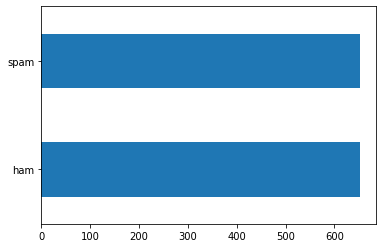

In [49]:
df_merged['class'].value_counts().plot(kind='barh')
plt.show()

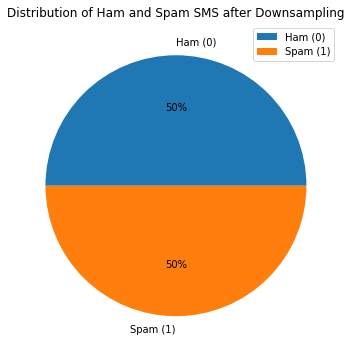

In [50]:
# plotting the distribution of target values after downsampling
fig,ax = plt.subplots(figsize=(8, 6))
lbl = ['Ham (0)', 'Spam (1)']
pct = '%1.0f%%'
ax = df_merged['class'].value_counts().plot(kind='pie',
                                                   labels=lbl,
                                                   autopct=pct)
ax.yaxis.set_visible(False)
plt.title('Distribution of Ham and Spam SMS after Downsampling')
plt.legend()
fig.savefig('plots/ham_spam_pie_chart_after_downsampling.png',
            facecolor='white')
plt.show()

In [51]:
# inserting a new column called 'label' to the merged dataframe
# if class is 'ham' label = 0
# if class is 'spam' label = 1
df_merged['label'] = df_merged['class'].map({'ham': 0, 'spam': 1})
df_merged

,sms_message,class,label
0,"Evening * v good if somewhat event laden. Will fill you in, don't you worry … Head * ok but throat * wrecked. See you at six then!",ham,0
1,I'll probably be around mu a lot,ham,0
2,ALRITE,ham,0
3,Lol I would but despite these cramps I like being a girl.,ham,0
4,Waiting 4 my tv show 2 start lor... U leh still busy doing ur report?,ham,0
...,...,...,...
1301,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,spam,1
1302,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250...,spam,1
1303,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove...",spam,1
1304,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",spam,1


In [52]:
# inserting a new column called 'length' to the merged dataframe
# the column contains the number of characters of the sms_message text
df_merged['length'] = df_merged['sms_message'].apply(len)
df_merged

,sms_message,class,label,length
0,"Evening * v good if somewhat event laden. Will fill you in, don't you worry … Head * ok but throat * wrecked. See you at six then!",ham,0,130
1,I'll probably be around mu a lot,ham,0,32
2,ALRITE,ham,0,6
3,Lol I would but despite these cramps I like being a girl.,ham,0,57
4,Waiting 4 my tv show 2 start lor... U leh still busy doing ur report?,ham,0,69
...,...,...,...,...
1301,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,spam,1,90
1302,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250...,spam,1,158
1303,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove...",spam,1,160
1304,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",spam,1,147


In [53]:
# displaying the first 5 rows of the dataframe
df_merged.head()

,sms_message,class,label,length
0,"Evening * v good if somewhat event laden. Will fill you in, don't you worry … Head * ok but throat * wrecked. See you at six then!",ham,0,130
1,I'll probably be around mu a lot,ham,0,32
2,ALRITE,ham,0,6
3,Lol I would but despite these cramps I like being a girl.,ham,0,57
4,Waiting 4 my tv show 2 start lor... U leh still busy doing ur report?,ham,0,69


In [54]:
# displaying the last 5 rows of the dataframe
df_merged.tail()

,sms_message,class,label,length
1301,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,spam,1,90
1302,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250...,spam,1,158
1303,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove...",spam,1,160
1304,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",spam,1,147
1305,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-...",spam,1,160


In [55]:
# displaying the dimensionality of the dataframe
df_merged.shape

(1306, 4)

In [56]:
# printing a concise summary of the dataframe

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sms_message  1306 non-null   object
 1   class        1306 non-null   object
 2   label        1306 non-null   int64 
 3   length       1306 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 40.9+ KB


In [57]:
# generating descriptive statistics of the dataframe
df_merged.describe().round(2)

,label,length
count,1306.0,1306.00
mean,0.5,104.17
std,0.5,55.56
min,0.0,5.00
25%,0.0,49.25
50%,0.5,115.00
75%,1.0,152.00
max,1.0,588.00


In [58]:
# generating descriptive statistics for each class of the dataframe
# T property is used to transpose index and columns of the dataframe
df_merged.groupby('label').describe().T

label                  0           1
length count  653.000000  653.000000
       mean    70.633997  137.704441
       std     55.104301   29.821348
       min      5.000000   13.000000
       25%     34.000000  132.000000
       50%     52.000000  148.000000
       75%     89.000000  157.000000
       max    588.000000  223.000000

In [59]:
# generating descriptive sms text length statistics by label types
df_merged.groupby('label')['length'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,653.0,70.63,55.10,5.0,34.0,52.0,89.0,588.0
1,653.0,137.70,29.82,13.0,132.0,148.0,157.0,223.0


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


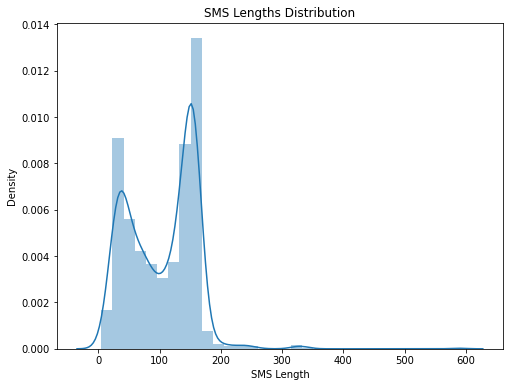

In [60]:
# plotting a univariate distribution of observations for sms lengths
fig,ax = plt.subplots(figsize=(8, 6))
ax = sns.distplot(df_merged['length'].values)
plt.title('SMS Lengths Distribution')
plt.xlabel('SMS Length')
plt.savefig('plots/sms_length.png',
            facecolor='white')
plt.show()

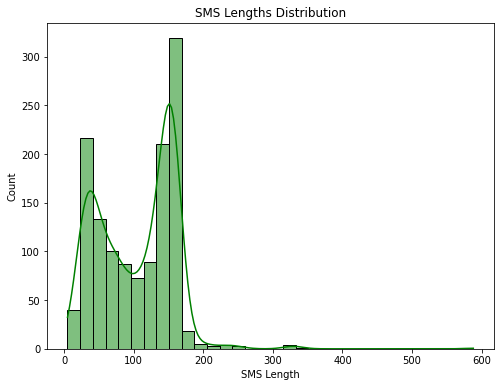

In [61]:
# plotting a univariate distribution of observations for sms lengths using histplot()
fig,ax = plt.subplots(figsize=(8, 6))
ax = sns.histplot(df_merged['length'].values, kde=True, color = 'g')
plt.title('SMS Lengths Distribution')
plt.xlabel('SMS Length')
plt.savefig('plots/sms_length.png',
            facecolor='white')
plt.show()

In [62]:
# saving merged dataset to a csv file
file_name = 'processed_datasets/merged_dataset.csv'
df_merged.to_csv(file_name,
                        encoding='utf-8',
                        index=False)

# loading dataset from the saved csv file to a pandas dataframe
df_merged = pd.read_csv(file_name)
df_merged

,sms_message,class,label,length
0,"Evening * v good if somewhat event laden. Will fill you in, don't you worry … Head * ok but throat * wrecked. See you at six then!",ham,0,130
1,I'll probably be around mu a lot,ham,0,32
2,ALRITE,ham,0,6
3,Lol I would but despite these cramps I like being a girl.,ham,0,57
4,Waiting 4 my tv show 2 start lor... U leh still busy doing ur report?,ham,0,69
...,...,...,...,...
1301,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,spam,1,90
1302,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250...,spam,1,158
1303,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove...",spam,1,160
1304,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",spam,1,147


In [63]:
# assigning attributes (features) to X
X =df_merged['sms_message']
X

0                          Evening * v good if somewhat event laden. Will fill you in, don't you worry … Head * ok but throat * wrecked. See you at six then!
1                                                                                                                            I'll probably be around mu a lot
2                                                                                                                                                      ALRITE
3                                                                                                   Lol I would but despite these cramps I like being a girl.
4                                                                                       Waiting 4 my tv show 2 start lor... U leh still busy doing ur report?
                                                                                ...                                                                          
1301                                                

In [64]:
# assigning label (target) to y
y = df_merged['label'].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [65]:
# importing train_test_split from scikit-learn library
from sklearn.model_selection import train_test_split

# splitting data into random train and test subsets
# train set - 80%, test set - 20%
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=443)

# printing the dimension of train features dataframe
print('Shape of train features dataframe:', X_train.shape)
print('Shape of train target dataframe:', y_train.shape)
print('Shape of test features dataframe:', X_test.shape)
print('Shape of test target dataframe:', y_test.shape)

Shape of train features dataframe: (1044,)
Shape of train target dataframe: (1044,)
Shape of test features dataframe: (262,)
Shape of test target dataframe: (262,)


In [66]:
# displaying train features dataframe
X_train

540               I wud never mind if u dont miss me or if u dont need me.. But u wil really hurt me wen u need me &amp; u dont tell me......... Take care:-)
1069    Do you want a new Video phone? 600 anytime any network mins 400 Inclusive Video calls AND downloads 5 per week Free delTOMORROW call 08002888812 o...
477                                                                                                            I jokin oni lar.. Ü busy then i wun disturb ü.
580                                                                                                                              Nice.nice.how is it working?
541                                                                                                Hey i'm bored... So i'm thinking of u... So wat r u doing?
                                                                                ...                                                                          
479                                                 

In [67]:
# displaying train target dataframe
y_train

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [68]:
# displaying test features dataframe
X_test

749     Get ur 1st RINGTONE FREE NOW! Reply to this msg with TONE. Gr8 TOP 20 tones to your phone every week just £1.50 per wk 2 opt out send STOP 0845281...
298           Hey i booked the kb on sat already... what other lessons are we going for ah? Keep your sat night free we need to meet and confirm our lodging 
651                                                                                        What u talking bout early morning? It's almost noon where your at!
364                                                                                                                              But if she.s drinkin i'm ok.
379                                                                                                                          Sir send to group mail check it.
                                                                                ...                                                                          
203                                                 

In [69]:
# displaying test target dataframe
y_test

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

In [70]:
# defining pre-processing hyperparameters
oov_token = '<OOV>'
vocabulary_size = 500

In [71]:

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=vocabulary_size,
                      char_level=False,
                      oov_token=oov_token)

# updating internal vocabulary based on a list of text required before
# using texts_to_sequences
tokenizer.fit_on_texts(X_train)

In [72]:
# getting the word_index
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 'is': 11,
 '2': 12,
 'and': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'in': 17,
 'have': 18,
 'on': 19,
 'me': 20,
 '4': 21,
 'ur': 22,
 'of': 23,
 'from': 24,
 'txt': 25,
 'are': 26,
 'with': 27,
 'text': 28,
 'my': 29,
 'this': 30,
 'it': 31,
 'just': 32,
 'get': 33,
 'no': 34,
 'mobile': 35,
 'stop': 36,
 'that': 37,
 'claim': 38,
 'reply': 39,
 'we': 40,
 'only': 41,
 'www': 42,
 'do': 43,
 'our': 44,
 'prize': 45,
 'out': 46,
 'will': 47,
 'if': 48,
 'so': 49,
 'at': 50,
 'be': 51,
 'not': 52,
 'send': 53,
 'can': 54,
 'cash': 55,
 'new': 56,
 't': 57,
 'but': 58,
 'up': 59,
 'go': 60,
 'urgent': 61,
 'msg': 62,
 '150p': 63,
 'please': 64,
 'know': 65,
 'won': 66,
 'contact': 67,
 'when': 68,
 'nokia': 69,
 'all': 70,
 'com': 71,
 "i'm": 72,
 'uk': 73,
 'what': 74,
 'been': 75,
 'as': 76,
 '1': 77,
 'by': 78,
 'who': 79,
 'want': 80,
 'phone': 81,
 'week': 82,
 'guaranteed':

In [73]:
# printing length of the word index
len(word_index)

4051

In [74]:
# transforming each text in train data to a sequence of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train)

# printing the first sequence
X_train_sequences[0]

[5,
 1,
 1,
 356,
 48,
 9,
 148,
 251,
 20,
 16,
 48,
 9,
 148,
 119,
 20,
 58,
 9,
 1,
 275,
 1,
 20,
 1,
 9,
 119,
 20,
 461,
 9,
 148,
 176,
 20,
 132,
 314]

In [75]:
# getting lengths of each generated sequences of integers
# in train data
x_train_length_of_sequence = [len(sequence) for sequence in X_train_sequences]

# printing the length of the first sequence
print(f"Length of the first sequence:\n{'-'*29}\n{x_train_length_of_sequence[0]}")
# printing maximum length of a sequence in the train data
print(f"maximum length of a sequence in the train data:\n{'-'*49}\n{np.max(x_train_length_of_sequence)}")



Length of the first sequence:
-----------------------------
32
maximum length of a sequence in the train data:
-------------------------------------------------
121


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


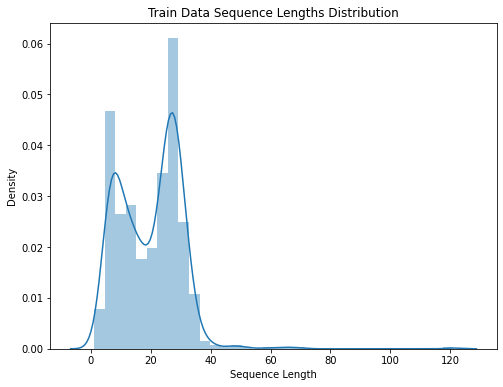

In [76]:
# plotting a univariate distribution of observations for
# sequence lengths of train data
fig,ax = plt.subplots(figsize=(8, 6))
ax, sns.distplot(x_train_length_of_sequence)
plt.title('Train Data Sequence Lengths Distribution')
plt.xlabel('Sequence Length')
plt.savefig('plots/train_sequence_length.png',
            facecolor='white')
plt.show()

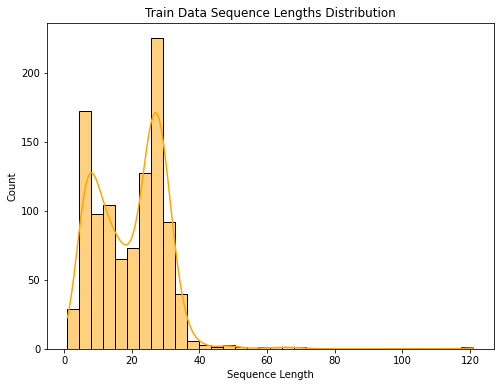

In [77]:
# plotting a univariate distribution of observations for
# sequence lengths of train data
fig,ax = plt.subplots(figsize=(8, 6))
ax = sns.histplot(x_train_length_of_sequence, kde=True, color = 'orange')
plt.title('Train Data Sequence Lengths Distribution')
plt.xlabel('Sequence Length')
plt.savefig('plots/train_sequence_length.png',
            facecolor='white')
plt.show()

In [78]:
# transforming each text in test data to a sequence of integers
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# printing the first sequence

X_test_sequences[0]

[33,
 22,
 289,
 220,
 15,
 14,
 39,
 2,
 30,
 62,
 27,
 86,
 1,
 350,
 1,
 151,
 2,
 8,
 81,
 121,
 82,
 32,
 137,
 92,
 125,
 161,
 12,
 353,
 46,
 53,
 36,
 1,
 98]

In [79]:
# getting lengths of each generated sequences of integers
# in test data
x_test_length_of_sequence = [len(sequence) for sequence in X_test_sequences]

# printing the length of the first sequence
print(f"length of the first sequence:\n{'-'*29}\n{x_test_length_of_sequence[0]}")

# printing maximum length of a sequence in the test data
print(f"maximum length of a sequence in the test data:\n{'-'*45}\n{np.max(x_test_length_of_sequence)}")


length of the first sequence:
-----------------------------
33
maximum length of a sequence in the test data:
---------------------------------------------
70


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


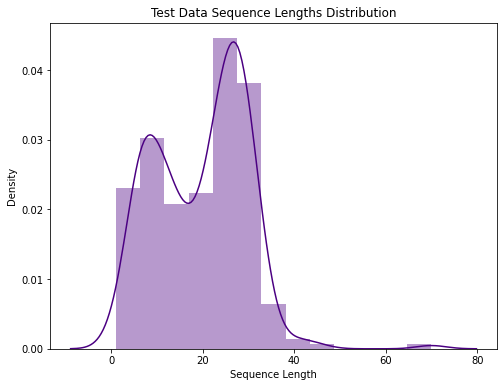

In [80]:
# plotting a univariate distribution of observations for sequence
# lengths of test data
fig,ax = plt.subplots(figsize=(8, 6))
ax= sns.distplot(x_test_length_of_sequence, color ='indigo')
plt.title('Test Data Sequence Lengths Distribution')
plt.xlabel('Sequence Length')
plt.savefig('plots/test_sequence_length.png',
            facecolor='white')
plt.show()

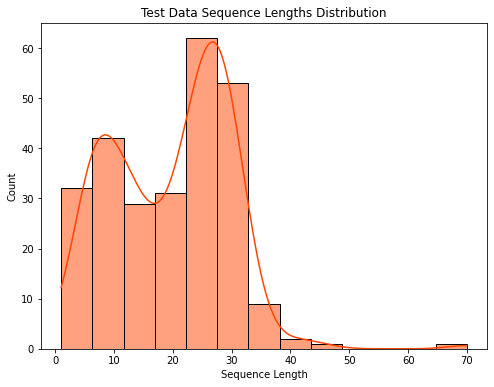

In [81]:
fig,ax = plt.subplots(figsize=(8, 6))
ax = sns.histplot(x_test_length_of_sequence, kde= True, color ='orangered')
plt.title('Test Data Sequence Lengths Distribution')
plt.xlabel('Sequence Length')
plt.savefig('plots/test_sequence_length.png',
            facecolor='white')
plt.show()

In [82]:
# defining pre-processing hyperparameter
maximum_length = 50
truncating_type = 'post'
padding_type = 'post'

In [83]:
# importing utilities for preprocessing sequence data from
# keras library
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_padded = pad_sequences(X_train_sequences,
                               maxlen=maximum_length,
                               padding=padding_type,
                               truncating=truncating_type)

# printing the first padded sequence
X_train_padded[0]

array([  5,   1,   1, 356,  48,   9, 148, 251,  20,  16,  48,   9, 148,
       119,  20,  58,   9,   1, 275,   1,  20,   1,   9, 119,  20, 461,
         9, 148, 176,  20, 132, 314,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [84]:
# getting lengths of each padded sequences of integers in train
# data
x_train_length_of_padded_sequence = [len(sequence) for sequence in X_train_padded]

# printing the length of the first padded sequence
print(f"Length of the first padded sequence:\n{'-'*39}\n{x_train_length_of_padded_sequence[0]}")


# printing maximum length of a padded sequence in the train data
print(f"maximum length of a padded sequence in the train data:\n{'-'*54}\n{np.max(x_train_length_of_padded_sequence)}")

# printing the dimension of padded training dataframe
print(f"dimension of padded training dataframe:\n{'-'*39}\n{X_train_padded.shape}")

Length of the first padded sequence:
---------------------------------------
50
maximum length of a padded sequence in the train data:
------------------------------------------------------
50
dimension of padded training dataframe:
---------------------------------------
(1044, 50)


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


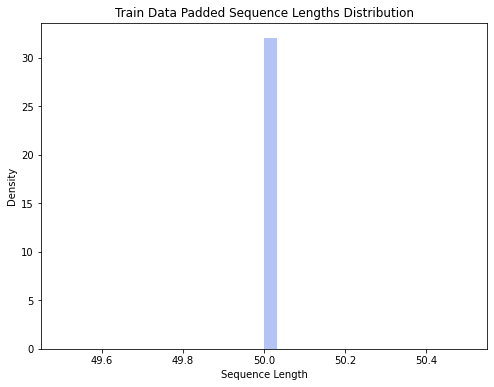

In [85]:
# plotting a univariate distribution of observations for sequence
# lengths of train data after padding
fig,ax = plt.subplots(figsize=(8, 6))
ax= sns.distplot(x_train_length_of_padded_sequence, color ='royalblue')
plt.title('Train Data Padded Sequence Lengths Distribution')
plt.xlabel('Sequence Length')
plt.savefig('plots/train_padded_sequence_length.png',
            facecolor='white')
plt.show()

In [86]:
# padding on test data
X_test_padded = pad_sequences(X_test_sequences,
                              maxlen=maximum_length,
                              padding=padding_type,
                              truncating=truncating_type)

# printing the first padded sequence
X_test_padded[0]

array([ 33,  22, 289, 220,  15,  14,  39,   2,  30,  62,  27,  86,   1,
       350,   1, 151,   2,   8,  81, 121,  82,  32, 137,  92, 125, 161,
        12, 353,  46,  53,  36,   1,  98,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [87]:
# getting lengths of each padded sequences of integers in test
# data
x_test_length_of_padded_sequence = [len(sequence) for sequence in X_test_padded]

# printing the length of the first padded sequence

print(f"length of the first padded sequence:\n{'-'*35}\n{x_test_length_of_padded_sequence[0]}")
# printing maximum length of a padded sequence in the test data
print(f"maximum length of a padded sequence in the test data:\n{'-'*55}\n{np.max(x_test_length_of_padded_sequence)}")
# printing the dimension of padded test dataframe
print(f"dimension of padded test dataframe:\n{'-'*35}\n{X_test_padded.shape}")


length of the first padded sequence:
-----------------------------------
50
maximum length of a padded sequence in the test data:
-------------------------------------------------------
50
dimension of padded test dataframe:
-----------------------------------
(262, 50)


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


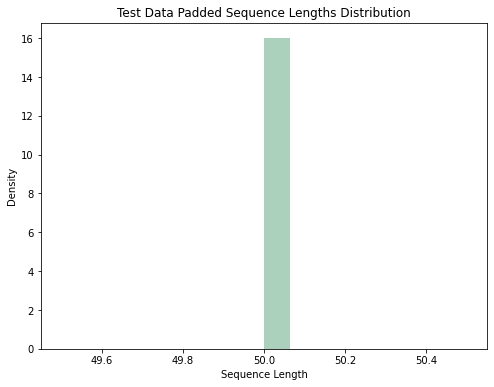

In [88]:
# plotting a univariate distribution of observations for
# sequence lengths of test data after padding
fig,ax = plt.subplots(figsize=(8, 6))
ax= sns.distplot(x_test_length_of_padded_sequence, color ='seagreen')
plt.title('Test Data Padded Sequence Lengths Distribution')
plt.xlabel('Sequence Length')
plt.savefig('plots/test_padded_sequence_length.png',
            facecolor='white')
plt.show()

# Modelo LSTM

Long Short Term Memory (LSTM) Red neuronal recurrente (RNN)Los modelos LSTM están diseñados explícitamente para evitar el problema de dependencia a largo plazo al recordar información durante largos períodos de tiempo.

In [89]:
# LSTM network architecture hyperparameters
dropout_rate = 0.2
no_of_nodes = 20
embedding_dimension = 16
no_of_epochs = 30
vocabulary_size = 500

In [90]:
# importing Sequential class from keras
# Sequential groups a linear stack of layers into a keras Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

# importing LSTM class from keras layers api package
# LSTM - Long Short-Term Memory layer
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [91]:
# LSTM model architecture

lstm_model = Sequential()

lstm_model.add(Embedding(vocabulary_size, embedding_dimension,
                input_length=maximum_length))
lstm_model.add(LSTM(no_of_nodes, dropout=dropout_rate,
                return_sequences=True))

lstm_model.add(LSTM(no_of_nodes,dropout=dropout_rate,
                return_sequences=True))
lstm_model.add(Dense(1, activation='sigmoid'))

In [92]:
# compiling the model
# configuring the model for training
lstm_model.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [93]:
# printing a string summary of the network
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
lstm (LSTM)                  (None, 50, 20)            2960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
dense (Dense)                (None, 50, 1)             21        
Total params: 14,261
Trainable params: 14,261
Non-trainable params: 0
_________________________________________________________________


In [94]:
# importing EarlyStopping class from callbacks module
# in keras library
from tensorflow.keras.callbacks import EarlyStopping

In [95]:

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3)

In [96]:
# training the LSTM model
history = lstm_model.fit(X_train_padded,
                         y_train,
                         epochs=no_of_epochs,
                         validation_data=(X_test_padded, y_test),
                         callbacks=[early_stopping],
                         verbose=2)



Epoch 1/30
33/33 - 8s - loss: 0.6795 - accuracy: 0.6139 - val_loss: 0.6276 - val_accuracy: 0.6647
Epoch 2/30
33/33 - 1s - loss: 0.4387 - accuracy: 0.7988 - val_loss: 0.2594 - val_accuracy: 0.9226
Epoch 3/30
33/33 - 1s - loss: 0.2477 - accuracy: 0.9246 - val_loss: 0.2141 - val_accuracy: 0.9392
Epoch 4/30
33/33 - 1s - loss: 0.2011 - accuracy: 0.9411 - val_loss: 0.1974 - val_accuracy: 0.9395
Epoch 5/30
33/33 - 1s - loss: 0.1763 - accuracy: 0.9469 - val_loss: 0.2105 - val_accuracy: 0.9350
Epoch 6/30
33/33 - 1s - loss: 0.1602 - accuracy: 0.9502 - val_loss: 0.2010 - val_accuracy: 0.9365
Epoch 7/30
33/33 - 1s - loss: 0.1431 - accuracy: 0.9547 - val_loss: 0.1871 - val_accuracy: 0.9388
Epoch 8/30
33/33 - 1s - loss: 0.1283 - accuracy: 0.9596 - val_loss: 0.1953 - val_accuracy: 0.9366
Epoch 9/30
33/33 - 1s - loss: 0.1235 - accuracy: 0.9597 - val_loss: 0.2059 - val_accuracy: 0.9326
Epoch 10/30
33/33 - 1s - loss: 0.1258 - accuracy: 0.9580 - val_loss: 0.1874 - val_accuracy: 0.9352


In [97]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

model = Sequential()
model.add(Embedding(180568, 82))
model.add(LSTM(10))
model.add(Dense(67, activation='softmax'))
# model.add(Dropout(0.2))
# model.add(Activation('sigmoid'))
model.build()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model(tf.random.uniform((10, 82))).shape


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 82)          14806576  
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                3720      
_________________________________________________________________
dense_1 (Dense)              (None, 67)                737       
Total params: 14,811,033
Trainable params: 14,811,033
Non-trainable params: 0
_________________________________________________________________


TensorShape([10, 67])

In [98]:
# visualizing the history results by reading as a dataframe
metrics_lstm = pd.DataFrame(history.history)
metrics_lstm

,loss,accuracy,val_loss,val_accuracy
0,0.679483,0.613908,0.627641,0.664733
1,0.438668,0.798774,0.259431,0.922596
2,0.247674,0.924579,0.214120,0.939237
3,0.201127,0.941054,0.197389,0.939466
4,0.176272,0.946916,0.210457,0.935038
5,0.160160,0.950172,0.201015,0.936489
6,0.143115,0.954713,0.187141,0.938779
7,0.128303,0.959579,0.195290,0.936565
8,0.123519,0.959732,0.205888,0.932595
9,0.125815,0.957969,0.187449,0.935191


In [99]:
# renaming the column names of the dataframe
metrics_lstm.rename(columns={'loss': 'Training_Loss',
                             'accuracy': 'Training_Accuracy',
                             'val_loss': 'Validation_Loss',
                             'val_accuracy': 'Validation_Accuracy'},
                    inplace=True)
metrics_lstm

,Training_Loss,Training_Accuracy,Validation_Loss,Validation_Accuracy
0,0.679483,0.613908,0.627641,0.664733
1,0.438668,0.798774,0.259431,0.922596
2,0.247674,0.924579,0.214120,0.939237
3,0.201127,0.941054,0.197389,0.939466
4,0.176272,0.946916,0.210457,0.935038
5,0.160160,0.950172,0.201015,0.936489
6,0.143115,0.954713,0.187141,0.938779
7,0.128303,0.959579,0.195290,0.936565
8,0.123519,0.959732,0.205888,0.932595
9,0.125815,0.957969,0.187449,0.935191


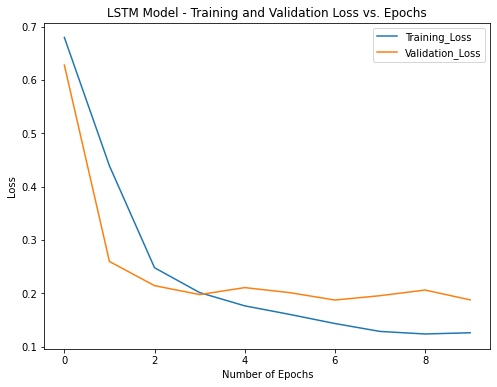

In [100]:
# plotting the training and validation loss by number of epochs for
# the LSTM model
plt.rcParams["figure.figsize"] = (8,6)
metrics_lstm[['Training_Loss', 'Validation_Loss']].plot()
plt.title('LSTM Model - Training and Validation Loss vs. Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(['Training_Loss', 'Validation_Loss'])
plt.savefig('plots/lstm_loss_vs_epochs.png',
            facecolor='white')
plt.show()

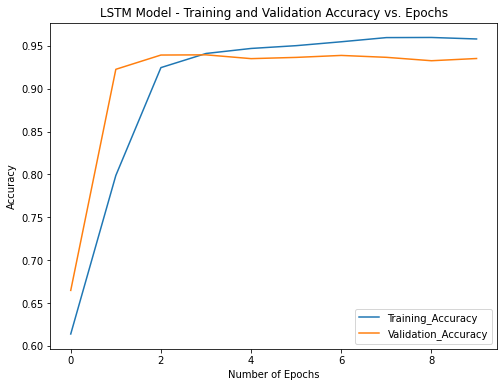

In [101]:
# plotting the training and validation accuracy by number of epochs for
# the LSTM model
plt.rcParams["figure.figsize"] = (8,6)
metrics_lstm[['Training_Accuracy', 'Validation_Accuracy']].plot()
plt.title('LSTM Model - Training and Validation Accuracy vs. Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_Accuracy', 'Validation_Accuracy'])
plt.savefig('plots/lstm_accuracy_vs_epochs.png',
            facecolor='white')
plt.show()

## Guardando el Modelo

In [102]:
# saving the trained LSTM model as an h5 file
# h5 is a file format to store structured data
lstm_path = 'models/lstm_model.h5'
lstm_model.save(lstm_path)
lstm_model

In [103]:
# importing load_model function from keras to load a saved keras
# deep learning model
from tensorflow.keras.models import load_model

# loading the saved LSTM model
loaded_lstm_model = load_model(lstm_path)
loaded_lstm_model

# Evaluación del Modelo LSTM 

In [104]:
# evaluating the LSTM model performance on test data
loaded_lstm_model.evaluate(X_test_padded,
                           y_test)

9/9 [==============================] - 1s 8ms/step - loss: 0.1874 - accuracy: 0.9352


[0.18744900822639465, 0.9351908564567566]

In [105]:
# predicting labels of X_test data values on the basis of the
# trained model
y_pred_lstm = [1 if x[0][0] > 0.5 else 0 for x in loaded_lstm_model.predict(X_test_padded)]

# printing the length of the predictions list
len(y_pred_lstm)

262

In [106]:
# printing the first 25 elements of the predictions list
y_pred_lstm[:25]

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0]

In [107]:
# importing mean_squared_error from scikit-learn library
from sklearn.metrics import mean_squared_error

# mean squared error (MSE)
print('MSE :', mean_squared_error(y_test,
                                  y_pred_lstm))

# root mean squared error (RMSE)
# square root of the average of squared differences between predicted
# and actual value of variable
print('RMSE:', mean_squared_error(y_test,
                                  y_pred_lstm,
                                  squared=False))

MSE : 0.29389312977099236
RMSE: 0.5421191103170893


In [108]:
# importing mean_absolute_error from scikit-learn library
from sklearn.metrics import mean_absolute_error

# mean absolute error (MAE)
print('MAE:', mean_absolute_error(y_test,
                                  y_pred_lstm))

MAE: 0.29389312977099236


In [109]:
# importing accuracy_score from scikit-learn library
from sklearn.metrics import accuracy_score

# accuracy
# ratio of the number of correct predictions to the total number of
# input samples
print('Accuracy:', accuracy_score(y_test,
                                  y_pred_lstm))

Accuracy: 0.7061068702290076


In [110]:
# importing precision_recall_fscore_support from scikit-learn library
from sklearn.metrics import precision_recall_fscore_support

print('\t\t\tPrecision \t\tRecall \t\tF-Measure \tSupport')

# computing precision, recall, f-measure and support for each class
# with average='micro'
print('average=micro    -', precision_recall_fscore_support(y_test,
                                                            y_pred_lstm,
                                                            average='micro'))

# computing precision, recall, f-measure and support for each class
# with average='macro'
print('average=macro    -', precision_recall_fscore_support(y_test,
                                                            y_pred_lstm,
                                                            average='macro'))

# computing precision, recall, f-measure and support for each class
# with average='weighted'
print('average=weighted -', precision_recall_fscore_support(y_test,
                                                            y_pred_lstm,
                                                            average='weighted'))

			Precision 		Recall 		F-Measure 	Support
average=micro    - (0.7061068702290076, 0.7061068702290076, 0.7061068702290076, None)
average=macro    - (0.7626657969123722, 0.7112873134328358, 0.6925585577348025, None)
average=weighted - (0.765591258637374, 0.7061068702290076, 0.6910805600081619, None)


In [111]:
# importing classification_report from scikit-learn library
# used to measure the quality of predictions from a
# classification algorithm
from sklearn.metrics import classification_report

# report shows the main classification metrics precision, recall and
# f1-score on a per-class basis
print(classification_report(y_test,
                            y_pred_lstm))

              precision    recall  f1-score   support

           0       0.63      0.94      0.76       128
           1       0.89      0.49      0.63       134

    accuracy                           0.71       262
   macro avg       0.76      0.71      0.69       262
weighted avg       0.77      0.71      0.69       262



In [112]:
# importing confusion_matrix from scikit-learn library
from sklearn.metrics import confusion_matrix

# confusion matrix is a summarized table used to assess the performance
# of a classification model
print(confusion_matrix(y_test,
                       y_pred_lstm))

[[120   8]
 [ 69  65]]


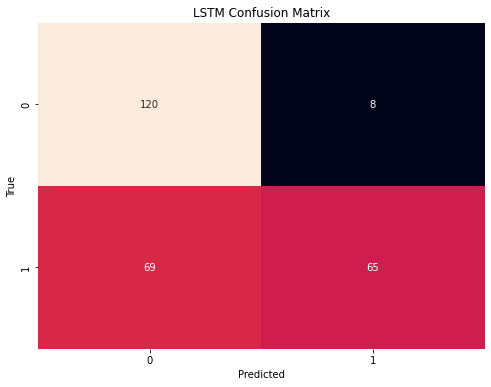

In [113]:
# importing plot_confusion_matrix from scikit-learn library

# plotting the confusion matrix
cm = confusion_matrix(y_test,
                      y_pred_lstm)
sns.heatmap(cm,
            annot=True,
            cbar=False,
            fmt='g')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('plots/lstm_confusion_matrix.png',
            facecolor='white')
plt.show()

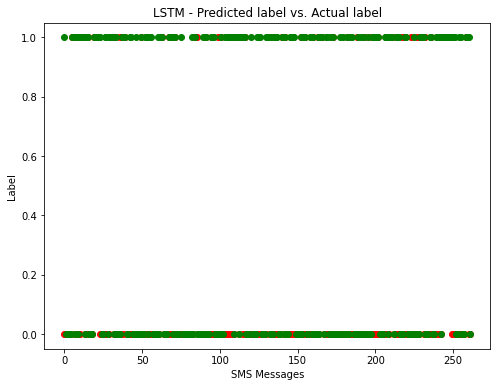

In [114]:
# plotting scatter plot to visualize overlapping of predicted and
# test target data points
plt.scatter(range(len(y_pred_lstm)),
            y_pred_lstm,
            color='red')
plt.scatter(range(len(y_test)),
            y_test,
            color='green')
plt.title('LSTM - Predicted label vs. Actual label')
plt.xlabel('SMS Messages')
plt.ylabel('Label')
plt.savefig('plots/lstm_predicted_vs_real.png',
            facecolor='white')
plt.show()

## Modelo CNN (DenseNet)

In [115]:
# Densely Connected CNN (DenseNet) architecture hyperparameters

# SpatialDropout1D is used to dropout the embedding layer which helps
# to drop entire 1D feature maps instead of individual elements
# dropout_rate indicates the fraction of the units to drop for the
dropout_rate = 0.2

# embedding_dimension indicates the dimension of the state space used for
# reconstruction
embedding_dimension = 16

# no_of_epochs indicates the number of complete passes through the
# training dataset
no_of_epochs = 30

# vocabulary_size indicates the maximum number of unique words to
vocabulary_size = 500

In [116]:
# importing Sequential class from keras
# Sequential groups a linear stack of layers into a keras Model
from tensorflow.keras.models import Sequential

# importing Embedding class from keras layers api package
# turning positive integers (indexes) into dense vectors of fixed size
# this layer can only be used as the first layer in a model
from tensorflow.keras.layers import Embedding

# importing GlobalAveragePooling1D class from keras layers api package
# used to perform global average pooling operation for temporal data
from tensorflow.keras.layers import GlobalAveragePooling1D

# importing Dropout class from keras layers api package
# used to apply Dropout to the input
# Dropout is one of the most effective and most commonly used 
from tensorflow.keras.layers import Dropout

# importing Dense class from keras layers api package
# Dense class is a regular densely-connected neural network layer
# Dense implements the operation:
# output = activation(dot(input, kernel) + bias)
# activation is the element-wise activation function passed as
# the activation argument
# kernel is a weights matrix created by the layer
# bias is a bias vector created by the layer
# (only applicable if use_bias is True)
from tensorflow.keras.layers import Dense

In [117]:
# Densely Connected CNN (DenseNet) model architecture

densenet_cnn_model = Sequential()

densenet_cnn_model.add(Embedding(vocabulary_size,
                                 embedding_dimension,
                                 input_length=maximum_length))

densenet_cnn_model.add(GlobalAveragePooling1D())

# Rectified Linear Activation Function (ReLU) is a piecewise linear
# function that will output the input directly if it is positive,
# otherwise, it will output zero
densenet_cnn_model.add(Dense(24,
                             activation='relu'))

densenet_cnn_model.add(Dropout(dropout_rate))

# sigmoid is a non-linear and easy to work with activation function
# that takes a value as input and outputs another value between 0 and 1
densenet_cnn_model.add(Dense(1,
                             activation='sigmoid'))

In [118]:
# compiling the model
# configuring the model for training
densenet_cnn_model.compile(loss='binary_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

In [119]:
# printing a string summary of the network
densenet_cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


In [120]:
# monitoring the validation loss and if the validation loss is not
# improved after three epochs, then the model training is stopped
# it helps to avoid overfitting problem and indicates when to stop
# training before the deep learning model begins overfitting
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3)

In [121]:
# training the DenseNet CNN model
history = densenet_cnn_model.fit(X_train_padded,
                                 y_train,
                                 epochs=no_of_epochs,
                                 validation_data=(X_test_padded, y_test),
                                 callbacks=[early_stopping],
                                 verbose=2)

Epoch 1/30
33/33 - 1s - loss: 0.6839 - accuracy: 0.7730 - val_loss: 0.6742 - val_accuracy: 0.8015
Epoch 2/30
33/33 - 0s - loss: 0.6574 - accuracy: 0.8362 - val_loss: 0.6392 - val_accuracy: 0.8664
Epoch 3/30
33/33 - 0s - loss: 0.6097 - accuracy: 0.8697 - val_loss: 0.5820 - val_accuracy: 0.8664
Epoch 4/30
33/33 - 0s - loss: 0.5429 - accuracy: 0.8774 - val_loss: 0.5087 - val_accuracy: 0.8664
Epoch 5/30
33/33 - 0s - loss: 0.4641 - accuracy: 0.8793 - val_loss: 0.4321 - val_accuracy: 0.8817
Epoch 6/30
33/33 - 0s - loss: 0.3911 - accuracy: 0.8966 - val_loss: 0.3654 - val_accuracy: 0.8893
Epoch 7/30
33/33 - 0s - loss: 0.3323 - accuracy: 0.9004 - val_loss: 0.3092 - val_accuracy: 0.9122
Epoch 8/30
33/33 - 0s - loss: 0.2788 - accuracy: 0.9109 - val_loss: 0.2656 - val_accuracy: 0.9237
Epoch 9/30
33/33 - 0s - loss: 0.2502 - accuracy: 0.9262 - val_loss: 0.2305 - val_accuracy: 0.9351
Epoch 10/30
33/33 - 0s - loss: 0.2144 - accuracy: 0.9377 - val_loss: 0.2030 - val_accuracy: 0.9466
Epoch 11/30
33/33 -

In [122]:
# visualizing the history results by reading as a dataframe
densenet_cnn_metrics = pd.DataFrame(history.history)
densenet_cnn_metrics

,loss,accuracy,val_loss,val_accuracy
0,0.683885,0.772988,0.674177,0.801527
1,0.657404,0.836207,0.639165,0.866412
2,0.609718,0.869732,0.582037,0.866412
3,0.542870,0.877395,0.508669,0.866412
4,0.464124,0.879310,0.432113,0.881679
5,0.391057,0.896552,0.365351,0.889313
6,0.332341,0.900383,0.309205,0.912214
7,0.278824,0.910920,0.265641,0.923664
8,0.250229,0.926245,0.230485,0.935115
9,0.214351,0.937739,0.203028,0.946565


In [123]:
# renaming the column names of the dataframe
densenet_cnn_metrics.rename(columns={'loss': 'Training_Loss',
                                     'accuracy': 'Training_Accuracy',
                                     'val_loss': 'Validation_Loss',
                                     'val_accuracy': 'Validation_Accuracy'},
                            inplace=True)
densenet_cnn_metrics

,Training_Loss,Training_Accuracy,Validation_Loss,Validation_Accuracy
0,0.683885,0.772988,0.674177,0.801527
1,0.657404,0.836207,0.639165,0.866412
2,0.609718,0.869732,0.582037,0.866412
3,0.542870,0.877395,0.508669,0.866412
4,0.464124,0.879310,0.432113,0.881679
5,0.391057,0.896552,0.365351,0.889313
6,0.332341,0.900383,0.309205,0.912214
7,0.278824,0.910920,0.265641,0.923664
8,0.250229,0.926245,0.230485,0.935115
9,0.214351,0.937739,0.203028,0.946565


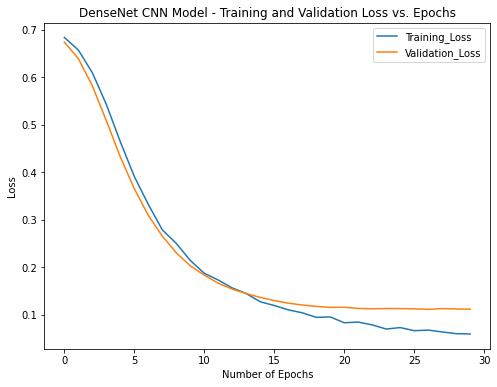

In [124]:
# plotting the training and validation loss by number of epochs for
# the DenseNet CNN model
densenet_cnn_metrics[['Training_Loss', 'Validation_Loss']].plot()
plt.title('DenseNet CNN Model - Training and Validation Loss vs. Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(['Training_Loss', 'Validation_Loss'])
plt.savefig('plots/densenet_cnn_loss_vs_epochs.png',
            facecolor='white')
plt.show()

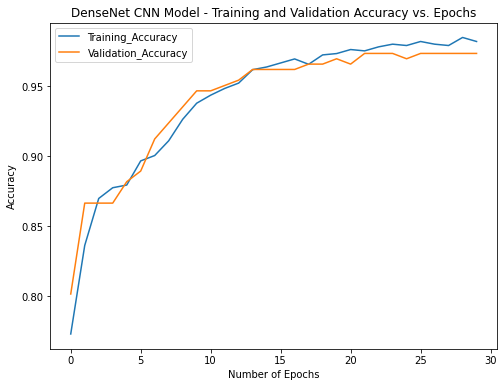

In [125]:
# plotting the training and validation accuracy by number of epochs
# for the DenseNet CNN model
densenet_cnn_metrics[['Training_Accuracy', 'Validation_Accuracy']].plot()
plt.title('DenseNet CNN Model - Training and Validation Accuracy vs. Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_Accuracy', 'Validation_Accuracy'])
plt.savefig('plots/densenet_cnn_accuracy_vs_epochs.png',
            facecolor='white')
plt.show()

In [126]:
# saving the trained DenseNet CNN model as an h5 file
# h5 is a file format to store structured data
# keras saves deep learning models in this format as it can easily store
# the weights and model configuration in a single file
densenet_cnn_path = 'models/densenet_cnn_model.h5'
densenet_cnn_model.save(densenet_cnn_path)
densenet_cnn_model

In [127]:
# loading the saved DenseNet CNN model
loaded_densenet_cnn_model = load_model(densenet_cnn_path)
loaded_densenet_cnn_model

# Evaluación de modelo CNN (DenseNet) 

In [128]:
# evaluating the DenseNet CNN model performance on test data
loaded_densenet_cnn_model.evaluate(X_test_padded,
                                   y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9733


[0.1118222177028656, 0.9732824563980103]

In [129]:
# predicting labels of X_test data values on the basis of the
# trained model
y_pred_densenet_cnn = [1 if x[0] > 0.5 else 0 for x in loaded_densenet_cnn_model.predict(X_test_padded)]

# printing the length of the predictions list
len(y_pred_densenet_cnn)

262

In [130]:
# printing the first 25 elements of the predictions list
y_pred_densenet_cnn[:25]

[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]

In [131]:
# mean squared error (MSE)
print('MSE :', mean_squared_error(y_test,
                                  y_pred_densenet_cnn))

# root mean squared error (RMSE)
# square root of the average of squared differences between predicted
# and actual value of variable
print('RMSE:', mean_squared_error(y_test,
                                  y_pred_densenet_cnn,
                                  squared=False))

MSE : 0.026717557251908396
RMSE: 0.16345506187300654


In [132]:
# mean absolute error (MAE)
print('MAE:', mean_absolute_error(y_test,
                                  y_pred_densenet_cnn))

MAE: 0.026717557251908396


In [133]:
# accuracy
# ratio of the number of correct predictions to the total number of
# input samples
print('Accuracy:', accuracy_score(y_test,
                                  y_pred_densenet_cnn))

Accuracy: 0.9732824427480916


In [134]:
print('\t\t\tPrecision \t\tRecall \t\tF-Measure \tSupport')

# computing precision, recall, f-measure and support for each class
# with average='micro'
print('average=micro    -', precision_recall_fscore_support(y_test,
                                                            y_pred_densenet_cnn,
                                                            average='micro'))

# computing precision, recall, f-measure and support for each class
# with average='macro'
print('average=macro    -', precision_recall_fscore_support(y_test,
                                                            y_pred_densenet_cnn,
                                                            average='macro'))

# computing precision, recall, f-measure and support for each class
# with average='weighted'
print('average=weighted -', precision_recall_fscore_support(y_test,
                                                            y_pred_densenet_cnn,
                                                            average='weighted'))

			Precision 		Recall 		F-Measure 	Support
average=micro    - (0.9732824427480916, 0.9732824427480916, 0.9732824427480916, None)
average=macro    - (0.9732824427480916, 0.9735307835820896, 0.9732789393166752, None)
average=weighted - (0.973544665229299, 0.9732824427480916, 0.973285946179508, None)


In [135]:
# report shows the main classification metrics precision, recall and
# f1-score on a per-class basis
print(classification_report(y_test,
                            y_pred_densenet_cnn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       128
           1       0.98      0.96      0.97       134

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



In [136]:
# confusion matrix is a summarized table used to assess the performance
# of a classification model
# number of correct and incorrect predictions are summarized with their
# count according to each class
print(confusion_matrix(y_test,
                       y_pred_densenet_cnn))

[[126   2]
 [  5 129]]


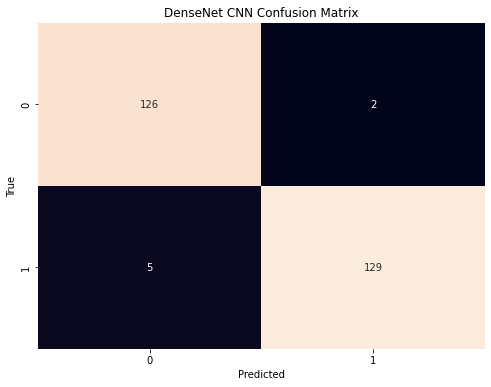

In [137]:
# plotting the confusion matrix
cm = confusion_matrix(y_test,
                      y_pred_densenet_cnn)
sns.heatmap(cm,
            annot=True,
            cbar=False,
            fmt='g')
plt.title('DenseNet CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('plots/densenet_cnn_confusion_matrix.png',
            facecolor='white')
plt.show()

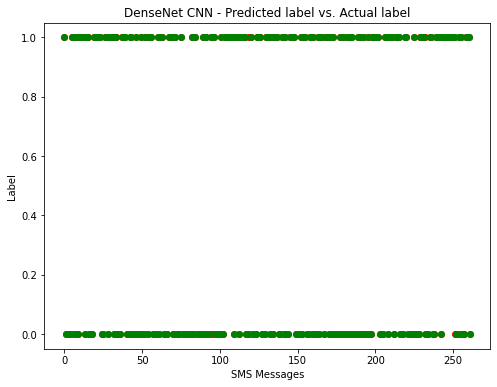

In [138]:
# plotting scatter plot to visualize overlapping of predicted and
# test target data points
plt.scatter(range(len(y_pred_densenet_cnn)),
            y_pred_densenet_cnn,
            color='red')
plt.scatter(range(len(y_test)),
            y_test,
            color='green')
plt.title('DenseNet CNN - Predicted label vs. Actual label')
plt.xlabel('SMS Messages')
plt.ylabel('Label')
plt.savefig('plots/densenet_cnn_predicted_vs_real.png',
            facecolor='white')
plt.show()

# Hacer predicciones con ejemplos del mundo real

In [139]:
# defining pre-processing hyperparameters

# maximum_length indicates the maximum number of words considered
# in a text
maximum_length = 50

# truncating_type indicates removal of values from sequences larger
# than maxlen, either at the beginning ('pre') or at the end ('post')
# of the sequences
truncating_type = 'post'

# padding_type indicates pad either before ('pre') or after ('post')
# each sequence
padding_type = 'post'

In [140]:
# defining a function to preprocess the sms message text to feed to the
# trained deep learning models
# the input text is transformed to a sequence of integers
# then the sequence is padded to the same length
# padding='post' to pad after each sequence
# the function returns the padded sequence
def preprocess_text(sms_messages):
    sequence = tokenizer.texts_to_sequences(sms_messages)
    padded_sequence = pad_sequences(sequence,
                                    maxlen=maximum_length,
                                    padding=padding_type,
                                    truncating=truncating_type)
    return padded_sequence

In [141]:
# defining a set of real-world samples for ham and spam sms messages
sms_messages = [
    'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.',
    'Hello, Janith! Did you go to the school yesterday? If you did, can you please send me the notes of all the subjects?',
    'Congratulations ur awarded 500 of CD vouchers or 125 gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066.',
    'A loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.abc.co.uk to opt out reply stop',
    'If he started searching, he will get job in few days. He has great potential and talent.',
    'One chance ONLY! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for FREE! Call The Mobile Update Co FREE on 08002986906.',
    'Valentines Day Special! Win over 1000 USD in cash in our quiz and take your partner on the trip of a lifetime! Send GO to 83600 now. 150 p/msg rcvd.',
    'Now I am better. Made up for Friday and stuffed myself like a pig yesterday. Now I feel bad.',
    'I got another job! The one at the hospital, doing data analysis or something, starts on Monday! Not sure when my thesis will finish.'
]

In [142]:
# invoking the preprocess_text function to preprocess and get the
# padded sequences of the set of real-world samples for ham and
# spam sms messages
padded_sequences = preprocess_text(sms_messages)
padded_sequences

array([[293,   3,   1,  51,   1,  59,   2, 460,   1,  17,   1,  24,   1,
          1,   1,  19,   4, 431,   1,  16,   1,  64,  39,   1,  10, 401,
         16,  36,   2, 353,  46,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [446,   1, 248,   3,  60,   2,   7,   1,   1,  48,   3, 248,  54,
          3,  64,  53,  20,   7,   1,  23,  70,   7,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [338,  22, 135, 205,  23,   1, 305,  16,   1, 265,  83,  15, 218,
         12, 377, 479, 110,  25, 266,   2, 480,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   1,  10,   1,  11,   1,  10,   3,  48,   3, 147,  30, 123,
         77, 115,   1,  55,  17,  77,   1,  50,  42,   1,  90,  73,   2,
     

In [143]:
# making prediction for the given set of real-world sms messages
# using the trained LSTM model

print('LSTM Model Predictions',
      end='\n\n')

lstm_prediction = []

for index, sms_message in enumerate(sms_messages):
    prediction = loaded_lstm_model.predict(padded_sequences)[index][0][0]
    lstm_prediction.append(prediction)
    if prediction > 0.5:
        print('SPAM -', prediction, '-', sms_message)
    else:
        print('HAM  -', prediction, '-', sms_message)

LSTM Model Predictions

SPAM - 0.5601804 - IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.
HAM  - 0.48809928 - Hello, Janith! Did you go to the school yesterday? If you did, can you please send me the notes of all the subjects?
SPAM - 0.6282145 - Congratulations ur awarded 500 of CD vouchers or 125 gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066.
SPAM - 0.50977725 - A loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.abc.co.uk to opt out reply stop
HAM  - 0.4888692 - If he started searching, he will get job in few days. He has great potential and talent.
HAM  - 0.45333052 - One chance ONLY! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for FREE! Call The Mobile Update Co FREE on 08002986906.
HAM  - 0.47938076 - Valentines Day Special! Win over 1000 USD in cash in our quiz and t

In [144]:
# making prediction for the given set of real-world sms messages
# using the trained DenseNet CNN model

print('DenseNet CNN Model Predictions',
      end='\n\n')

densenet_cnn_prediction = []

for index, sms_message in enumerate(sms_messages):
    prediction = loaded_densenet_cnn_model.predict(padded_sequences)[index][0]
    densenet_cnn_prediction.append(prediction)
    if prediction > 0.5:
        print('SPAM -', prediction, '-', sms_message)
    else:
        print('HAM  -', prediction, '-', sms_message)

DenseNet CNN Model Predictions

SPAM - 0.9988266 - IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.
HAM  - 0.03600502 - Hello, Janith! Did you go to the school yesterday? If you did, can you please send me the notes of all the subjects?
SPAM - 0.9985687 - Congratulations ur awarded 500 of CD vouchers or 125 gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066.
SPAM - 0.9997591 - A loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.abc.co.uk to opt out reply stop
HAM  - 0.0042924583 - If he started searching, he will get job in few days. He has great potential and talent.
SPAM - 0.9997531 - One chance ONLY! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for FREE! Call The Mobile Update Co FREE on 08002986906.
SPAM - 0.99273854 - Valentines Day Special! Win over 1000 USD in cash in our q

# Comparición de Modelos Deep Learning

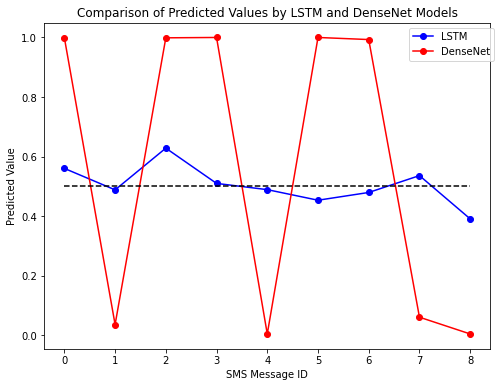

In [145]:
# plotting line graphs of the predicted values for LSTM and
# DenseNet CNN deep learning models to compare the separation
# of classes by each model
plt.plot(list(range(len(sms_messages))),
         lstm_prediction,
         label='LSTM',
         color='blue',
         marker='o')
plt.plot(list(range(len(sms_messages))),
         densenet_cnn_prediction,
         label='DenseNet',
         color='red',
         marker='o')
plt.plot(list(range(len(sms_messages))),
         [0.5 for x in range(len(sms_messages))],
         color='black',
         linestyle='dashed')
plt.title('Comparison of Predicted Values by LSTM and DenseNet Models')
plt.xlabel('SMS Message ID')
plt.ylabel('Predicted Value')
plt.legend(loc='upper right',
           bbox_to_anchor=(1.02, 1))
plt.savefig('plots/prediction_values_comparison.png',
            facecolor='white')
plt.show()

In [146]:
# importing roc_curve function from metrics package in scikit-learn
# library
from sklearn.metrics import roc_curve

# Receiver Operating Characteristic (ROC) metric to evaluate classifier
# output quality
# the ROC curve shows the trade-off between sensitivity (or TPR) and
# specificity (1 – FPR)
# classifiers that give curves closer to the top-left corner indicate
# a better performance
# the closer the curve comes to the 45-degree diagonal of the ROC space,
# the less accurate the test

false_positive_rate_lstm, true_positive_rate_lstm, threshold_lstm = roc_curve(y_test,
                                                                              y_pred_lstm)

false_positive_rate_densenet_cnn, true_positive_rate_densenet_cnn, threshold_densenet_cnn = roc_curve(y_test,
                                                                                                      y_pred_densenet_cnn)

print('LSTM - False Positive Rate (FPR):', false_positive_rate_lstm)
print('LSTM - True Positive Rate (TPR):', true_positive_rate_lstm)
print('LSTM - Threshold:', threshold_lstm)

print('DenseNet - False Positive Rate (FPR):', false_positive_rate_lstm)
print('DenseNet - True Positive Rate (TPR):', true_positive_rate_densenet_cnn)
print('DenseNet - Threshold:', threshold_densenet_cnn)

LSTM - False Positive Rate (FPR): [0.     0.0625 1.    ]
LSTM - True Positive Rate (TPR): [0.         0.48507463 1.        ]
LSTM - Threshold: [2 1 0]
DenseNet - False Positive Rate (FPR): [0.     0.0625 1.    ]
DenseNet - True Positive Rate (TPR): [0.         0.96268657 1.        ]
DenseNet - Threshold: [2 1 0]


In [147]:
from sklearn.metrics import auc

# Area Under the Curve (AUC) is used for computing the area under
# the ROC-curve

area_under_curve_lstm = auc(false_positive_rate_lstm,
                            true_positive_rate_lstm)

area_under_curve_densenet_cnn = auc(false_positive_rate_densenet_cnn,
                                    true_positive_rate_densenet_cnn)

print('LSTM - Area Under Curve (AUC):', area_under_curve_lstm)
print('DenseNet - Area Under Curve (AUC):', area_under_curve_densenet_cnn)

LSTM - Area Under Curve (AUC): 0.7112873134328358
DenseNet - Area Under Curve (AUC): 0.9735307835820896


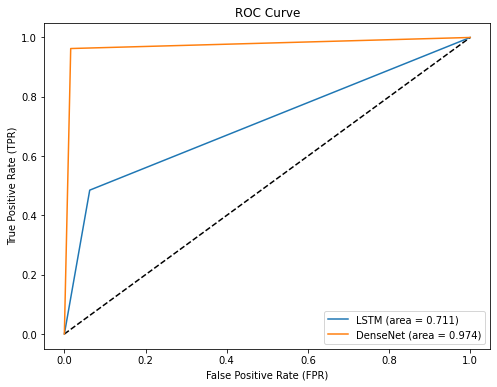

In [148]:
# plotting the ROC curves for LSTM and DenseNet models
plt.figure(1)
plt.plot([0, 1],
         [0, 1],
         'k--')
plt.plot(false_positive_rate_lstm,
         true_positive_rate_lstm,
         label='LSTM (area = {:.3f})'.format(area_under_curve_lstm))
plt.plot(false_positive_rate_densenet_cnn,
         true_positive_rate_densenet_cnn,
         label='DenseNet (area = {:.3f})'.format(area_under_curve_densenet_cnn))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('plots/roc_curve.png',
            facecolor='white')
plt.show()

In [149]:
# importing recall_score from scikit-learn library
from sklearn.metrics import recall_score

# importing precision_score from scikit-learn library
from sklearn.metrics import precision_score

# importing f1_score from scikit-learn library
from sklearn.metrics import f1_score

accuracy = {}
recall = {}
precision = {}
f1 = {}
rmse = {}
mae = {}

y_pred_dict = {
    'LSTM': y_pred_lstm,
    'DenseNet': y_pred_densenet_cnn
}

for y_pred in y_pred_dict:
    accuracy[y_pred] = accuracy_score(y_test,
                                      y_pred_dict[y_pred])
    recall[y_pred] = recall_score(y_test,
                                  y_pred_dict[y_pred],
                                  average='weighted')
    precision[y_pred] = precision_score(y_test,
                                        y_pred_dict[y_pred],
                                        average='weighted')
    f1[y_pred] = f1_score(y_test,
                          y_pred_dict[y_pred],
                          average='weighted')
    rmse[y_pred] = mean_squared_error(y_test,
                                      y_pred_dict[y_pred],
                                      squared=False)
    mae[y_pred] = mean_absolute_error(y_test,
                                      y_pred_dict[y_pred])

# ratio of the number of correct predictions to the total number
# of input samples
print('Accuracy:', accuracy)

# recall is the ratio tp / (tp + fn)
# tp is the number of true positives
# fn the number of false negatives
print('Recall:', recall)

# precision is the ratio tp / (tp + fp)
# tp is the number of true positives
# fp the number of false positives
print('Precision:', precision)

# F1 score is also known as balanced F-score or F-measure
# F1 score can be interpreted as a weighted average of the
# precision and recall
# F1 = 2 * (precision * recall) / (precision + recall)
print('F1 Score:', f1)

# root mean squared error (RMSE)
# square root of the average of squared differences between predicted
# and actual value of variable
print('RMSE:', rmse)

# mean absolute error (MAE)
print('MAE:', mae)

Accuracy: {'LSTM': 0.7061068702290076, 'DenseNet': 0.9732824427480916}
Recall: {'LSTM': 0.7061068702290076, 'DenseNet': 0.9732824427480916}
Precision: {'LSTM': 0.765591258637374, 'DenseNet': 0.973544665229299}
F1 Score: {'LSTM': 0.6910805600081619, 'DenseNet': 0.973285946179508}
RMSE: {'LSTM': 0.5421191103170893, 'DenseNet': 0.16345506187300654}
MAE: {'LSTM': 0.29389312977099236, 'DenseNet': 0.026717557251908396}


In [150]:
# sorting the accuracy scores of two deep learning models in
# descending order
sorted(accuracy.items(),
       key=lambda kv: kv[1],
       reverse=True)

[('DenseNet', 0.9732824427480916), ('LSTM', 0.7061068702290076)]

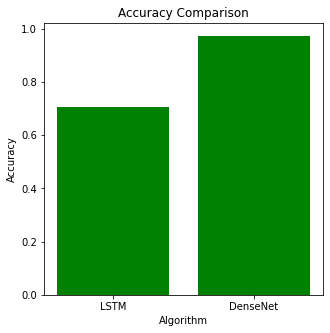

In [151]:
# plotting the accuracy comparison bar chart for the two
# deep learning models
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(y_pred_dict.keys(),
        accuracy.values(),
        color='g')
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.savefig('plots/accuracy_comparison.png',
            facecolor='white')
plt.show()

In [152]:
# defining a function to plot a bar chart with multiple bars
def bar_plot(ax,
             data,
             colors=None,
             total_width=0.8,
             single_width=1,
             legend=True):
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    n_bars = len(data)
    bar_width = total_width / n_bars
    bars = []
    for i, (name, values) in enumerate(data.items()):
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset,
                         y,
                         width=bar_width * single_width,
                         color=colors[i % len(colors)])
        bars.append(bar[0])
    if legend:
        ax.legend(bars,
                  data.keys())

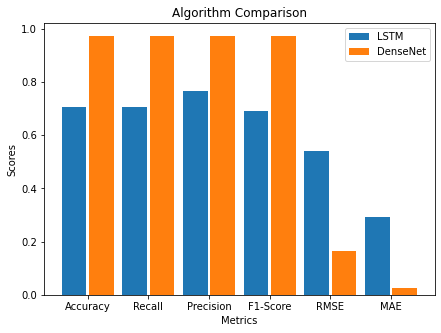

In [153]:
# plotting the algorithm comparison chart for all evaluation metrics

data = {}

for key in y_pred_dict.keys():
    data[key] = [accuracy[key],
                 recall[key],
                 precision[key],
                 f1[key],
                 rmse[key],
                 mae[key]]

fig, ax = plt.subplots(figsize=(7, 5))

bar_plot(ax,
         data,
         total_width=0.9,
         single_width=0.9)

plt.title('Algorithm Comparison')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(range(len(data[key])),
           ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'RMSE', 'MAE'])
plt.savefig('plots/algorithm_comparison.png',
            facecolor='white')
plt.show()